# HR Analytics

# Introduction

**Project Description**  

The project aims to develop machine learning models to help HR analysts at the company *"Careful Work"* predict employee job satisfaction levels and the likelihood of resignation. This will enable the business to minimize financial losses and reduce employee turnover.  

**Research Goal**  

To create and implement forecasting models capable of predicting employee satisfaction levels and resignation probability using company data.  

**Research Objectives**  

1. Develop a model to predict employee job satisfaction based on employee characteristics.  
2. Develop a model to predict employee resignation.  
3. Analyze the relationship between job satisfaction and resignations.  
4. Evaluate model performance using SMAPE (for satisfaction prediction) and ROC-AUC (for resignation prediction).  
5. Formulate business recommendations based on the findings.  

**Data Sources**  

**The company provided the following datasets:**  
- **train_job_satisfaction_rate.csv** – training data for predicting satisfaction.  
- **test_features.csv** – test feature set.  
- **test_target_job_satisfaction_rate.csv** – target variable for the satisfaction test set.  
- **train_quit.csv** – training data for predicting resignations.  
- **test_target_quit.csv** – target variable for the resignation test set.  

**Research Structure**  

**First Task: Predicting Employee Satisfaction Levels**  

1. Data Loading
2. Data Preprocessing  
3. Exploratory Data Analysis  
4. Data Preparation
5. Model Training 
6. Selecting the Best Model  

**Second Task: Predicting Employee Resignation**  

The same steps apply, but the focus shifts to predicting employee resignations, incorporating satisfaction data and parameter tuning.

# Part one

## File Loading

### Setup/Imports/Constants

In [1]:
%pip install phik -q
%pip install -U scikit-learn -q
%pip install shap -q
%pip install --upgrade scipy -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import phik
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression  
from sklearn.svm import SVC  
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import roc_auc_score

In [3]:
RANDOM_STATE = 42

### Load

In [4]:
satisfaction = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
satisfaction.info()
display(satisfaction.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [5]:
test_features = pd.read_csv('/datasets/test_features.csv')
test_features.info()
display(test_features.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [6]:
satisfaction_targets = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')
satisfaction_targets.info()
display(satisfaction_targets.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


### Conclusion

<div class="alert alert-info">
    
There are three tables with data:  
1. **train_job_satisfaction_rate:** Training data containing employee information, including the target variable (job satisfaction).  
2. **test_features:** Test features.  
3. **test_target_job_satisfaction_rate:** Target variables for the test dataset.  

The training dataset contains 4,000 rows, while each test dataset contains 2,000 rows. The test tables are linked to each other through the `id` column.

## Data Preprocessing

### Checking for duplicates

In [7]:
print(satisfaction['id'].nunique())
print(test_features['id'].nunique())
print(satisfaction_targets['id'].nunique())

4000
2000
2000


### Checking categorical features

In [8]:
cat_columns = satisfaction.select_dtypes(include=['object']).columns
for column in cat_columns:
    display(satisfaction[column].unique())

array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
      dtype=object)

array(['junior', 'middle', 'sinior', nan], dtype=object)

array(['medium', 'high', 'low'], dtype=object)

array(['no', 'yes'], dtype=object)

array(['no', 'yes'], dtype=object)

In [9]:
cat_columns = test_features.select_dtypes(include=['object']).columns
for column in cat_columns:
    display(satisfaction[column].unique())

array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
      dtype=object)

array(['junior', 'middle', 'sinior', nan], dtype=object)

array(['medium', 'high', 'low'], dtype=object)

array(['no', 'yes'], dtype=object)

array(['no', 'yes'], dtype=object)

In [10]:
satisfaction['level'] = satisfaction['level'].replace({'sinior':'senior'})
print(satisfaction['level'].unique())

['junior' 'middle' 'senior' nan]


### Data type conversion

In [11]:
satisfaction = satisfaction.astype({'id':'int32', 'employment_years':'int32', 'supervisor_evaluation':'int32',
                                  'salary':'int32', 'job_satisfaction_rate':'float32'})
test_features = test_features.astype({'id':'int32', 'employment_years':'int32','supervisor_evaluation':'int32',
                                  'salary':'int32'})
satisfaction_targets = satisfaction_targets.astype({'id':'int32', 'job_satisfaction_rate':'float32'})

In [12]:
satisfaction.info()
test_features.info()
satisfaction_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int32  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int32  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int32  
 8   salary                 4000 non-null   int32  
 9   job_satisfaction_rate  4000 non-null   float32
dtypes: float32(1), int32(4), object(5)
memory usage: 234.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----

### Conclusion

<div class="alert alert-info">
    
The data is good. I would remove the missing values, but according to the task, they need to be handled in the pipeline (which makes sense, as new data might be added later).
    
Additionally, I optimized data types for efficiency and corrected "sinior" to "senior" in employee levels.
</div>

## Exploratory Data Analysis

### Functions and Column Types

In [13]:
def show_plots(df, columns):
    num_plots = len(columns)
    discrete_cols = []
    continious_cols = []
    
    for col in columns:
        if(df[col].nunique() < 20):
            discrete_cols.append(col)
        else:
            continious_cols.append(col)
    
    plt.figure(figsize=(12, 10))
    
    for i, column in enumerate(continious_cols, 1):
        plt.subplot((num_plots // 3) + 1, 3, i)
        sns.histplot(df[column], bins=50)
        plt.title(column)
        
    for i, column in enumerate(discrete_cols, len(continious_cols) + 1):
        plt.subplot((num_plots // 3) + 1, 3, i)
        sns.countplot(x=df[column])
        plt.title(column)
        
    plt.tight_layout()
    plt.show()

In [14]:
def show_boxplots(df, num_columns):
    plt.figure(figsize=(10, 8))
    for i, column in enumerate(num_columns, 1):
        plt.subplot(3, 3, i)
        sns.boxplot(data=df[column])
        plt.title(column)
    plt.tight_layout()
    plt.show()

In [15]:
num_columns = satisfaction.drop(columns='id').select_dtypes(include=['int32', 'float32']).columns
print(num_columns)
cat_columns =  satisfaction.select_dtypes(include=['object']).columns
print(cat_columns)

Index(['employment_years', 'supervisor_evaluation', 'salary',
       'job_satisfaction_rate'],
      dtype='object')
Index(['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations'], dtype='object')


### Describe for numerical and count for categorical

In [16]:
display(satisfaction[num_columns].describe())

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,3.718500,3.476500,33926.700000,0.533995
std,2.542513,1.008812,14900.703838,0.225327
min,1.000000,1.000000,12000.000000,0.030000
25%,2.000000,3.000000,22800.000000,0.360000
50%,3.000000,4.000000,30000.000000,0.560000
75%,6.000000,4.000000,43200.000000,0.710000
max,10.000000,5.000000,98400.000000,1.000000


<div class="alert alert-info">  

No anomalies were observed in the Describe analysis. The average employee rating is 3.45, and the average job satisfaction is 0.53%, which seems quite low, but who are we to judge?

In [17]:
for col in cat_columns:
    counts = satisfaction[col].value_counts().iloc[::-1].to_frame().T
    counts.index = [col]  # Adding the category name as an index.
    print(counts.to_string(index=True, header=True, na_rep=""))
    print("-" * 55)

       hr  marketing  purchasing  technology  sales
dept  456        550         610         866   1512
-------------------------------------------------------
       senior  middle  junior
level     358    1744    1894
-------------------------------------------------------
          high   low  medium
workload   734  1200    2066
-------------------------------------------------------
                 yes    no
last_year_promo  120  3880
-------------------------------------------------------
                      yes    no
last_year_violations  559  3441
-------------------------------------------------------


### Graphics

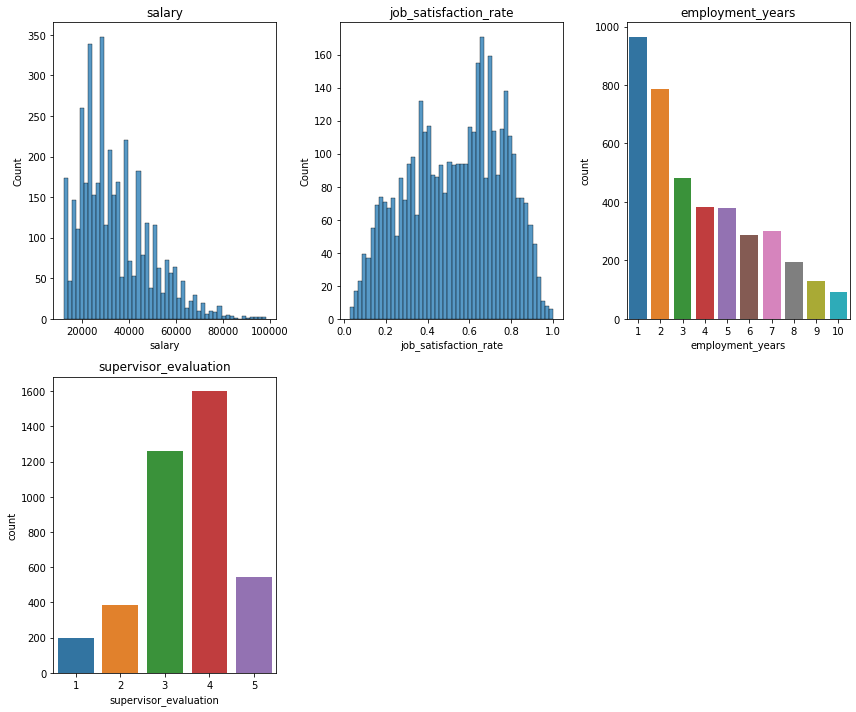

In [18]:
show_plots(satisfaction, num_columns)

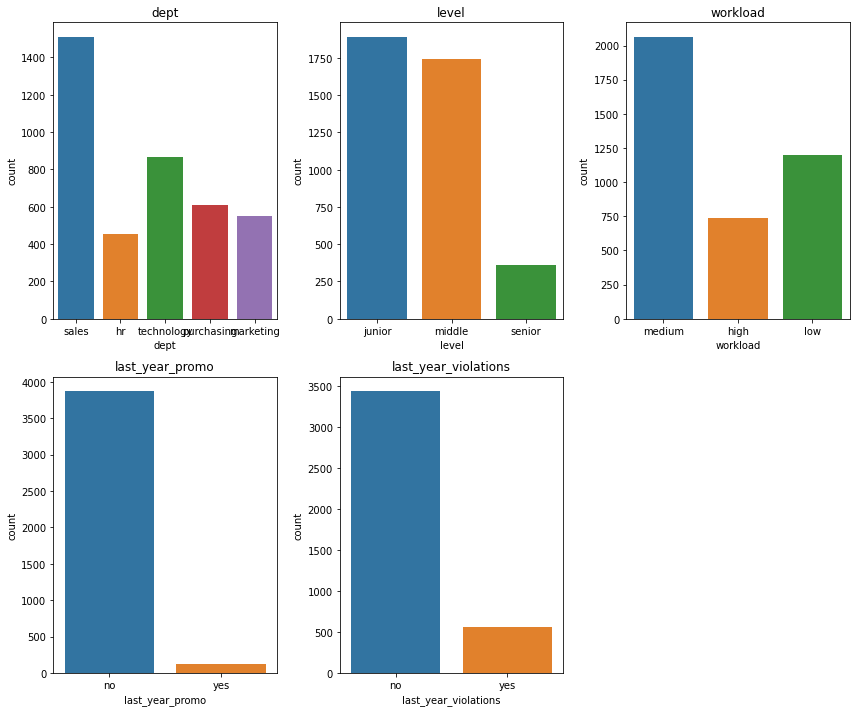

In [19]:
show_plots(satisfaction, cat_columns)

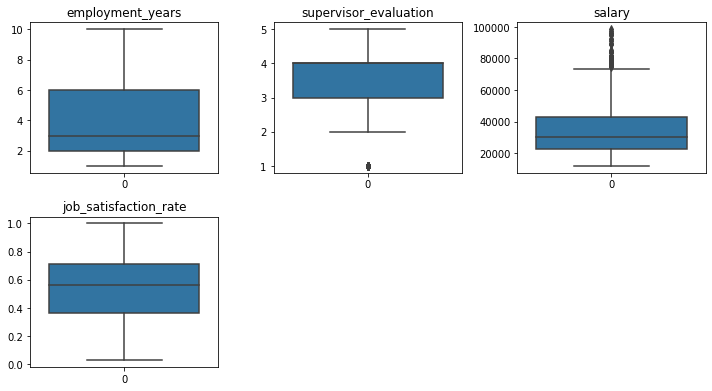

In [20]:
show_boxplots(satisfaction, num_columns)

<div class="alert alert-info">
    
The data looks fine, with no extreme outliers. Let's move on to analyzing the target variable.

### Graphs for the target variable

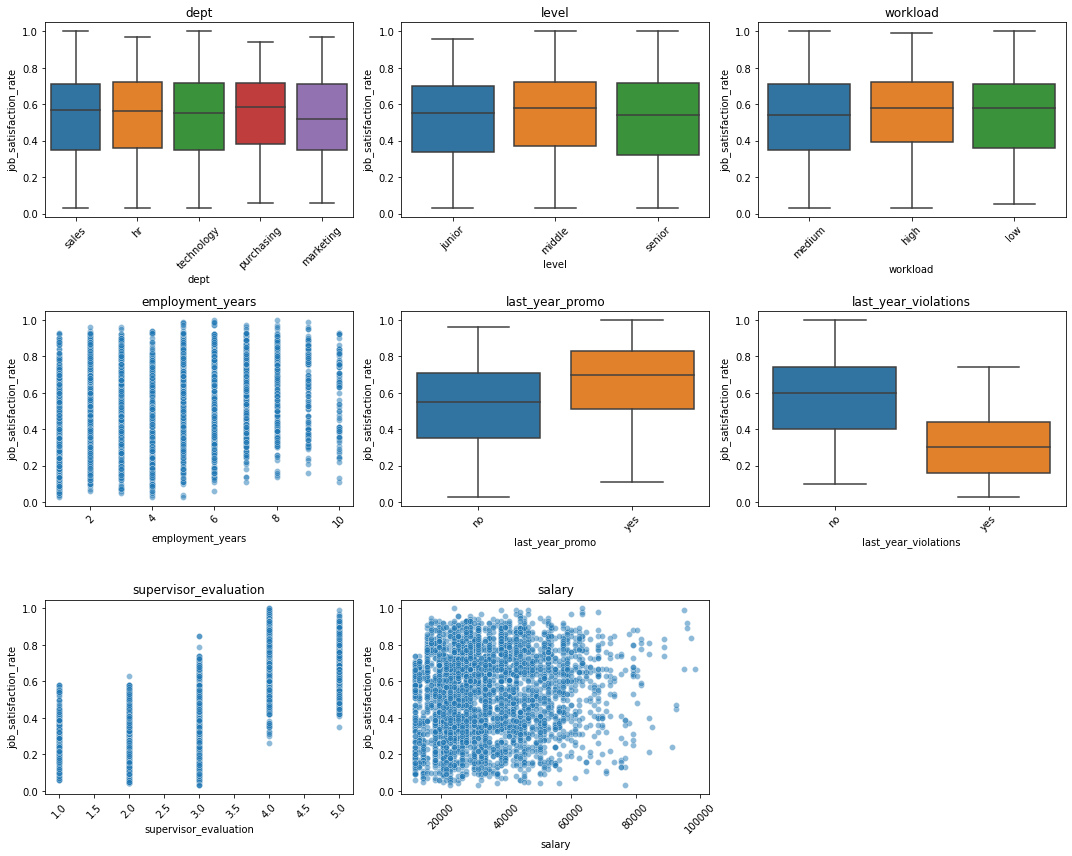

In [21]:
features = satisfaction.columns.drop(['id', 'job_satisfaction_rate'])

num_cols = 3
num_rows = -(-len(features) // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))

axes = axes.flatten()

for i, col in enumerate(features):
    ax = axes[i]
    if satisfaction[col].dtype == 'object':  # For categorical features.
        sns.boxplot(x=satisfaction[col], y=satisfaction['job_satisfaction_rate'], ax=ax)
    else:  # For numerical features.
        sns.scatterplot(x=satisfaction[col], y=satisfaction['job_satisfaction_rate'], ax=ax, alpha=0.5)

    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45) 

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<div class="alert alert-info">  

Key findings:  
1. **Department, employee level, and workload** have almost no impact on job satisfaction.  
2. **Salary and work experience** have a weak but noticeable influence.  
3. **Promotion history, violations, and employee rating** have a strong impact.

### Correlation Analysis

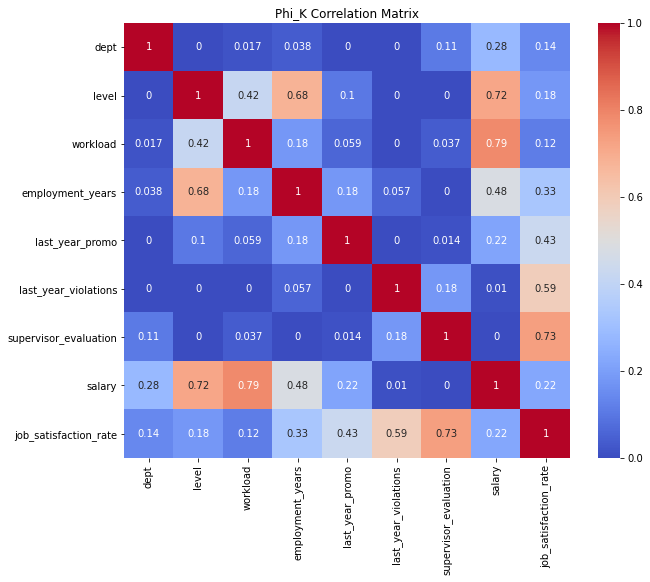

In [22]:
corr_matrix = satisfaction.drop(columns=['id']).phik_matrix(interval_cols=['salary'])
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

### Conclusion

<div class="alert alert-info">  

The weakest influences are **department, level, and workload**.  

The strongest influences are **evaluation, violation, and promotion**.  

## Data Preparation

### Preparing Encoders

In [23]:
ohe_columns = ['dept'] ## Many values, encoding using OneHotEncoder.
ord_columns = ['level', 'workload'] ## There is a gradation, using OrdinalEncoder.
bi_columns = ['last_year_promo', 'last_year_violations'] ## Two values, no gradation - using OrdinalEncoder.
num_columns = ['employment_years', 'supervisor_evaluation', 'salary'] ## Different ranges - using StandardScaler.

categories_order = [['junior', 'middle', 'senior'],  
                    ['low', 'medium', 'high']]

ohe_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ord_encoder = OrdinalEncoder(categories=categories_order, handle_unknown='use_encoded_value',
                             unknown_value=np.nan)
bi_encoder = OrdinalEncoder()
scaler = StandardScaler()

### Filling in missing values

In [24]:
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_num = SimpleImputer(strategy='median')

### Pipelines

In [25]:
cat_onehot_pipeline = Pipeline([
    ('imputer', imputer_cat),
    ('encoder', ohe_encoder)
])

cat_ordinal_pipeline = Pipeline([
    ('imputer', imputer_cat),
    ('encoder', ord_encoder)
])

binary_pipeline = Pipeline([
    ('imputer', imputer_cat),
    ('encoder', bi_encoder)
])

num_pipeline = Pipeline([
    ('imputer', imputer_num),
    ('scaler', scaler)
])

### Transformer and pipeline

In [26]:
preprocessor = ColumnTransformer(
    [
        ('ohe', cat_onehot_pipeline, ohe_columns),
        ('ord', cat_ordinal_pipeline, ord_columns),
        ('bi', binary_pipeline, bi_columns),
        ('num', num_pipeline, num_columns)
    ],
    remainder='passthrough'
)

pipe_final = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

## Model training

### SMAPE metric

In [27]:
def smape(y_true, y_pred):
    return 100 * np.mean(np.abs(y_true - y_pred) / ((np.abs(y_true) + np.abs(y_pred)) / 2))

smape_scorer = make_scorer(smape, greater_is_better=False)

### Datasets

In [28]:
X_train = satisfaction.drop(columns=['id', 'job_satisfaction_rate'])
y_train = satisfaction['job_satisfaction_rate']

test_data = test_features.merge(satisfaction_targets, on="id")
test_data.info()

X_test = test_data.drop(columns=['id'])
y_test = test_data['job_satisfaction_rate']

print(X_train.shape, X_test.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int32  
 1   dept                   1998 non-null   object 
 2   level                  1999 non-null   object 
 3   workload               2000 non-null   object 
 4   employment_years       2000 non-null   int32  
 5   last_year_promo        2000 non-null   object 
 6   last_year_violations   2000 non-null   object 
 7   supervisor_evaluation  2000 non-null   int32  
 8   salary                 2000 non-null   int32  
 9   job_satisfaction_rate  2000 non-null   float32
dtypes: float32(1), int32(4), object(5)
memory usage: 132.8+ KB
(4000, 8) (2000, 9)


### Hyperparameter Tuning

In [31]:
# Checking for Remaining NANs After Processing
X_train_transformed = preprocessor.fit_transform(X_train)
print(pd.DataFrame(X_train_transformed).isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64


In [32]:
# Hyperparameter Tuning for Models
param_grid = [
    {
        'model': [DecisionTreeRegressor()],
        'model__max_depth': [3, 5, 10, None],
        'model__min_samples_split': [2, 5, 10]
    },
    {
        'model': [LinearRegression()]
    },
    {
        'model': [RandomForestRegressor()],
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [3, 5, 10, None]
    }
]

gs = GridSearchCV(pipe_final, param_grid, cv=5, scoring=smape_scorer, n_jobs=-1)
gs.fit(X_train, y_train)

# Best model
print('The Best Model and Its Parameters:\n\n', gs.best_estimator_)
print("The Best Model's Metric Based on Cross-Validation Results:", -gs.best_score_)

The Best Model and Its Parameters:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                             

<div class="alert alert-info"> 

RandomForestRegressor showed a score of 13.2, while DecisionTreeRegressor had 15.18. Let's test it on the test set.

In [33]:
y_pred_test = gs.best_estimator_.predict(X_test)
smape_test = smape(y_test, y_pred_test)
print ("SMAPE metric is:", smape_test)

SMAPE metric is: 13.002425663593522


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Intermediate Conclusions

<div class="alert alert-info"> 

**After loading, preprocessing data, conducting exploratory analysis, and selecting models, we achieved strong results on the test dataset with a SMAPE score of 13.**  

The requirement was **≤ 15**.  

**RandomForestRegressor** proved to be the most suitable model since it effectively handles nonlinear dependencies and categorical features while also reducing overfitting compared to other models.  

We successfully predicted employee satisfaction with high accuracy, so now we can move on to predicting resignation intent.

# PART TWO

##  Loading new data

In [34]:
quit = pd.read_csv('/datasets/train_quit.csv')
quit.info()
display(quit.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [35]:
quit_targets = pd.read_csv('/datasets/test_target_quit.csv')
quit_targets.info()
display(quit_targets.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


<div class="alert alert-info">  

Two more tables:  
1. **train_quit:** Training data on resignations, with the target feature.  
2. **test_target_quit:** Test dataset.  

They contain 4000 and 2000 rows, respectively.  

## Preprocessing again

### Duplicates again

In [36]:
print(quit['id'].nunique())
print(quit_targets['id'].nunique())

4000
2000


### Categorical features again

In [37]:
cat_columns = quit.select_dtypes(include=['object']).columns
for column in cat_columns:
    print(f'-------{column}-------')
    display(quit[column].unique())

-------dept-------


array(['sales', 'purchasing', 'marketing', 'technology', 'hr'],
      dtype=object)

-------level-------


array(['middle', 'junior', 'sinior'], dtype=object)

-------workload-------


array(['high', 'medium', 'low'], dtype=object)

-------last_year_promo-------


array(['no', 'yes'], dtype=object)

-------last_year_violations-------


array(['no', 'yes'], dtype=object)

-------quit-------


array(['no', 'yes'], dtype=object)

In [38]:
quit['level'] = quit['level'].replace({'sinior':'senior'})
print(quit['level'].unique())

['middle' 'junior' 'senior']


### Type conversion again

In [39]:
quit = quit.astype({'id':'int32', 'employment_years':'int32', 'supervisor_evaluation':'int32',
                                  'salary':'int32'})
quit_targets = quit_targets.astype({'id':'int32'})

In [40]:
quit.info()
quit_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int32 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int32 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int32 
 8   salary                 4000 non-null   int32 
 9   quit                   4000 non-null   object
dtypes: int32(4), object(6)
memory usage: 250.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int32 
 1   quit    20

<div class="alert alert-info"> 

As before, the data is fine + type conversion and replacing "sinior" with "senior".

## Again, EDA (Exploratory Data Analysis).

### Salary and years

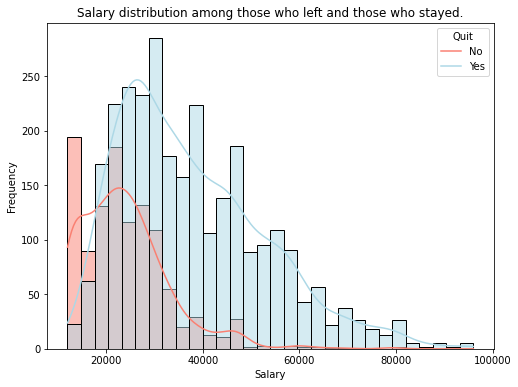

In [41]:
plt.figure(figsize=(8,6))

sns.histplot(data=quit, x='salary', hue='quit', bins=30, kde=True, alpha=0.5, palette={'no': 'lightblue', 'yes': 'salmon'})

plt.title('Salary distribution among those who left and those who stayed.')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend(title='Quit', labels=['No', 'Yes'])
plt.show()

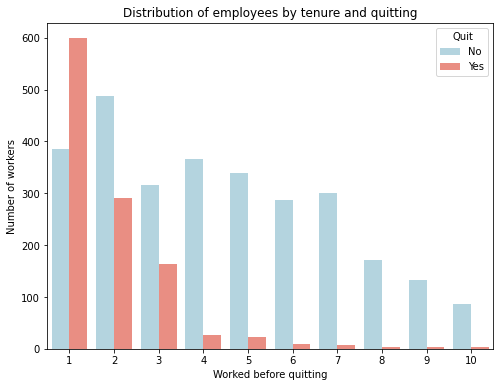

In [42]:
plt.figure(figsize=(8, 6))

sns.countplot(data=quit, x='employment_years', hue='quit', palette={'no': 'lightblue', 'yes': 'salmon'})

plt.title('Distribution of employees by tenure and quitting')
plt.xlabel('Worked before quitting')
plt.ylabel('Number of workers')
plt.legend(title='Quit', labels=['No', 'Yes'])
plt.show()

In [43]:
salary_stats = quit.groupby('quit')['salary'].agg(['mean', 'median'])
display(salary_stats)

,mean,median
quit,,
no,37702.228412,34800
yes,23885.106383,22800


In [44]:
def quit_pies(df, column):
    categories = df[column].unique()  
    fig, axes = plt.subplots(1, len(categories), figsize=(6 * len(categories), 6))

    if len(categories) == 1:
        axes = [axes]  # If there is only one category, we make a list.

    for i, category in enumerate(categories):
        data = df[df[column] == category]['quit'].value_counts()
        labels = ['Stayed', 'Quit']

        axes[i].pie(data, labels=labels, autopct='%.1f%%', startangle=90, colors=['lightblue', 'salmon'])
        axes[i].set_title(f'{column}: {category}')

    plt.show()

### Circles for those who quit

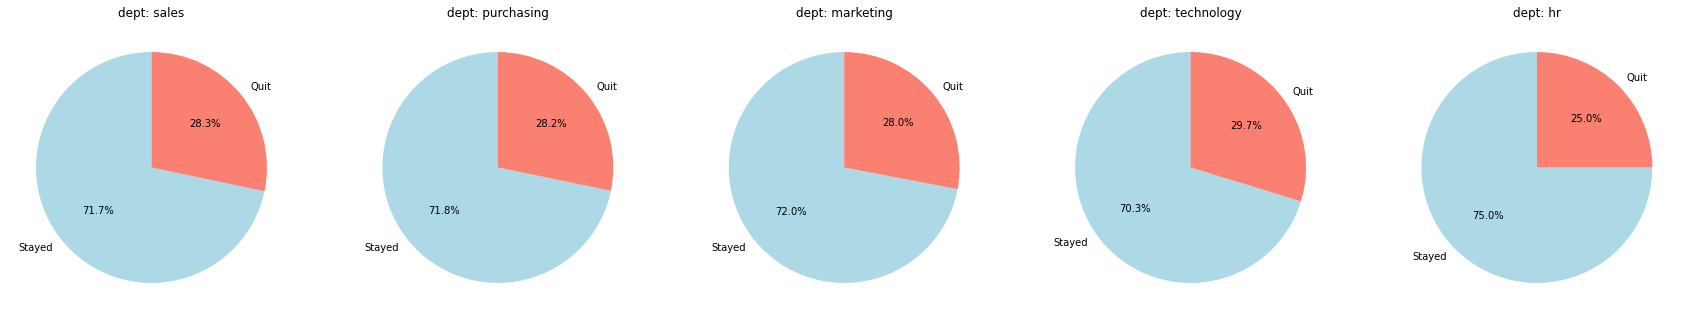

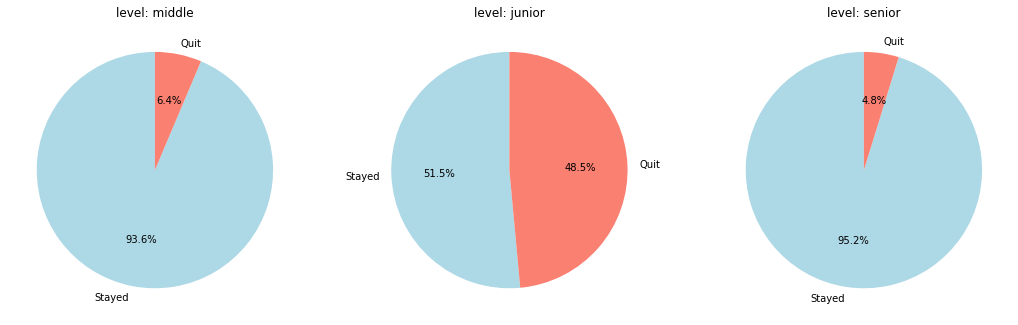

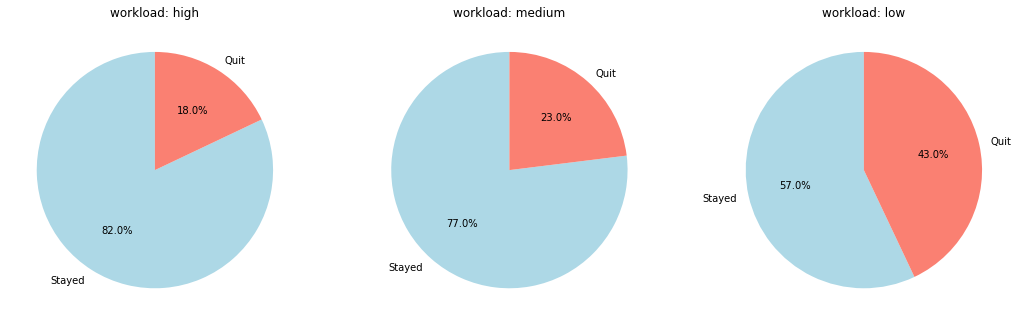

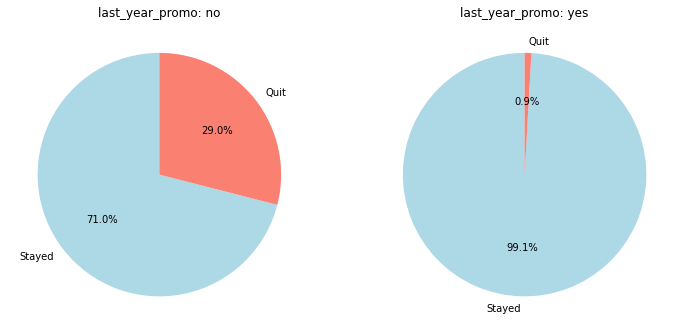

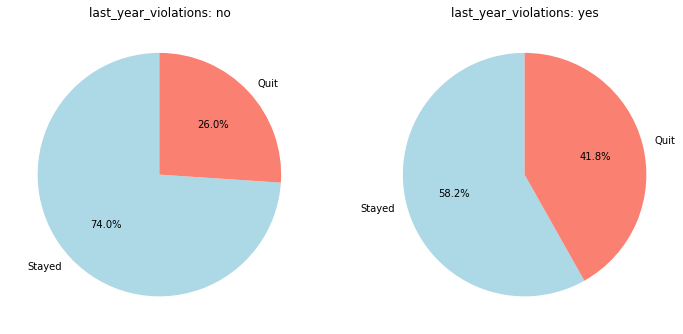

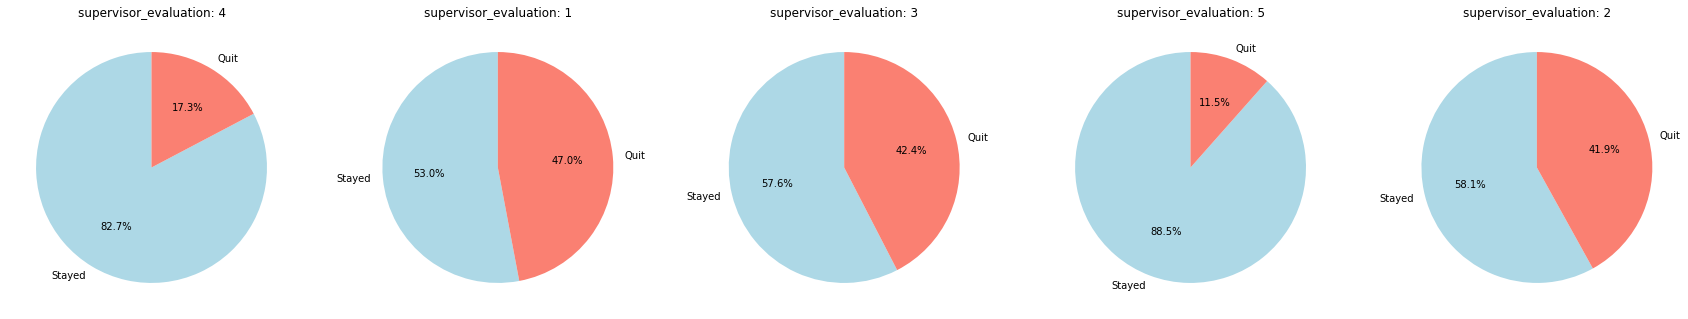

In [45]:
pie_columns = quit.drop(columns=['id', 'quit', 'salary', 'employment_years'])
# Building pie charts for all categorical columns
for col in pie_columns:
    quit_pies(quit, col)

### Satisfaction and quit

In [46]:
mix = satisfaction_targets.merge(quit_targets, on='id')
mix.info()
display(mix.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int32  
 1   job_satisfaction_rate  2000 non-null   float32
 2   quit                   2000 non-null   object 
dtypes: float32(1), int32(1), object(1)
memory usage: 46.9+ KB


,id,job_satisfaction_rate,quit
0,130604,0.74,no
1,825977,0.75,no
2,418490,0.60,yes
3,555320,0.72,no
4,826430,0.08,yes


interval columns not set, guessing: ['job_satisfaction_rate']


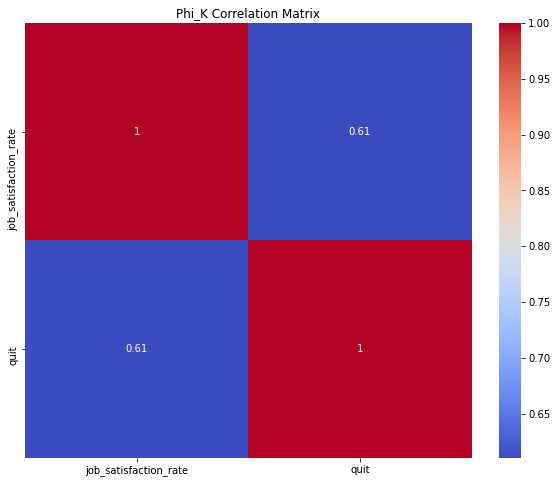

In [47]:
corr_matrix = mix.drop(columns=['id']).phik_matrix()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

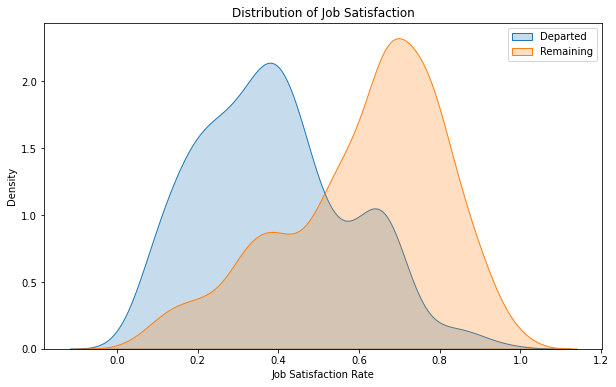

In [48]:
plt.figure(figsize=(10, 6))
sns.kdeplot(mix[mix['quit'] == 'yes']['job_satisfaction_rate'], label='Departed', shade=True)
sns.kdeplot(mix[mix['quit'] == 'no']['job_satisfaction_rate'], label='Remaining', shade=True)
plt.xlabel('Job Satisfaction Rate')
plt.ylabel('Density')
plt.title('Distribution of Job Satisfaction')
plt.legend()
plt.show()

### Conclusion

<div class="alert alert-info">

1. There are sharp disparities in salary and tenure. Many employees work for only one year and receive the minimum salary.  
2. Departments have almost no impact again.  
3. Nearly half of junior employees leave (which aligns with the one-year tenure).  
4. Interestingly, employees with a "low" workload tend to quit, though they are mostly juniors.  
5. Job performance ratings strongly influence resignations—the worse the rating, the higher the chance of leaving.  
6. There is a strong correlation between job satisfaction and resignation.

## Adding a new feature

In [49]:
quit['job_satisfaction_rate'] = gs.best_estimator_.predict(quit)
display(quit.head())

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.633050
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.825658
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.389835
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.350277
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.758436


## Preparing the data again

In [50]:
## Columns and encoders
ohe_columns = ['dept']
ord_columns = ['level', 'workload']
bi_columns = ['last_year_promo', 'last_year_violations']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

categories_order = [['junior', 'middle', 'senior'],  
                    ['low', 'medium', 'high']]

ohe_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ord_encoder = OrdinalEncoder(categories=categories_order, handle_unknown='use_encoded_value',
                             unknown_value=np.nan)
bi_encoder = OrdinalEncoder()
scaler = StandardScaler()

### Filling in missing values

imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_num = SimpleImputer(strategy='median')

### Pipelines
cat_onehot_pipeline = Pipeline([
    ('imputer', imputer_cat),
    ('encoder', ohe_encoder)
])

cat_ordinal_pipeline = Pipeline([
    ('imputer', imputer_cat),
    ('encoder', ord_encoder)
])

binary_pipeline = Pipeline([
    ('imputer', imputer_cat),
    ('encoder', bi_encoder)
])

num_pipeline = Pipeline([
    ('imputer', imputer_num),
    ('scaler', scaler)
])

## Final transformer and pipeline
preprocessor = ColumnTransformer(
    [
        ('ohe', cat_onehot_pipeline, ohe_columns),
        ('ord', cat_ordinal_pipeline, ord_columns),
        ('bi', binary_pipeline, bi_columns),
        ('num', num_pipeline, num_columns)
    ],
    remainder='passthrough'
)

pipe_final = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

## Models again

### Datasets again

In [51]:
X_train = quit.drop(columns=['id', 'quit'])
y_train = quit['quit']

test_data = test_features.merge(quit_targets, on='id').merge(satisfaction_targets, on='id')
test_data.info()

X_test = test_data.drop(columns=['id'])
y_test = test_data['quit']

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

print(X_train.shape, X_test.shape)
print(y_train[:5])
print(y_test[:5])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int32  
 1   dept                   1998 non-null   object 
 2   level                  1999 non-null   object 
 3   workload               2000 non-null   object 
 4   employment_years       2000 non-null   int32  
 5   last_year_promo        2000 non-null   object 
 6   last_year_violations   2000 non-null   object 
 7   supervisor_evaluation  2000 non-null   int32  
 8   salary                 2000 non-null   int32  
 9   quit                   2000 non-null   object 
 10  job_satisfaction_rate  2000 non-null   float32
dtypes: float32(1), int32(4), object(6)
memory usage: 148.4+ KB
(4000, 9) (2000, 10)
[0 0 0 1 0]
[0 0 0 0 0]


### Best model

In [52]:
param_grid = [
    {
        'model': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'model__n_estimators': [50, 100, 200],  # Количество деревьев
        'model__max_depth': range(4, 7),
        'model__max_features': range(6, 9),
        'preprocessor__num': [StandardScaler()],
    },
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler()],
    },
    {
        'model': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'model__C': range(1, 3),
        'preprocessor__num': [StandardScaler()],
    },
    {
        'model': [SVC(
            random_state=RANDOM_STATE,
            kernel='rbf'
        )],
        'preprocessor__num': [StandardScaler()],
    }
]

In [53]:
gs = GridSearchCV(pipe_final, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
gs.fit(X_train, y_train)

# Best model
print('Best model and its parameters:\n\n', gs.best_estimator_)
print('Metric of the best model based on cross-validation results:', gs.best_score_)

Best model and its parameters:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                 

In [54]:
y_pred_proba_test = gs.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba_test)
print ("ROC-AUC:", roc_auc)

ROC-AUC: 0.933029717102274


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


<div class="alert alert-info">  
    0.93 is good, I will try to improve it further.

### Feature selection

RandomForestClassifier(max_depth=6, max_features=6, random_state=42)


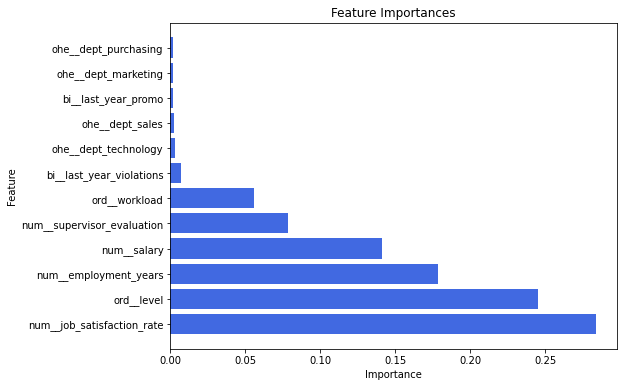

In [55]:
best_model = gs.best_estimator_.named_steps['model']
print(best_model)

feature_names = gs.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 6))
plt.barh(range(len(importances)), importances[indices], align="center", color="royalblue")
plt.yticks(range(len(importances)), np.array(feature_names)[indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.gca().invert_yaxis()
plt.show()

<div class="alert alert-info">  
The least significant features are the department, whether there were violations, and whether there were promotions. I'll try removing them.

### With removed features

In [56]:
## Columns and encoders
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

categories_order = [['junior', 'middle', 'senior'],  
                    ['low', 'medium', 'high']]

ord_encoder = OrdinalEncoder(categories=categories_order, handle_unknown='use_encoded_value',
                             unknown_value=np.nan)
scaler = StandardScaler()

### Filling in missing values

imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_num = SimpleImputer(strategy='median')

### Pipelines

cat_ordinal_pipeline = Pipeline([
    ('imputer', imputer_cat),
    ('encoder', ord_encoder)
])

num_pipeline = Pipeline([
    ('imputer', imputer_num),
    ('scaler', scaler)
])

## Final Transformer and pipeline
preprocessor = ColumnTransformer(
    [
        ('ord', cat_ordinal_pipeline, ord_columns),
        ('num', num_pipeline, num_columns)
    ],
    remainder='passthrough'
)

pipe_final = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

X_train = quit.drop(columns=['id','dept', 'quit','last_year_promo', 'last_year_violations'])
y_train = quit['quit']

test_data = test_features.merge(quit_targets, on='id').merge(satisfaction_targets, on='id')
test_data.info()

X_test = test_data.drop(columns=['id', 'dept', 'last_year_promo', 'last_year_violations'])
y_test = test_data['quit']

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

print(X_train.shape, X_test.shape)
print(y_train[:5])
print(y_test[:5])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int32  
 1   dept                   1998 non-null   object 
 2   level                  1999 non-null   object 
 3   workload               2000 non-null   object 
 4   employment_years       2000 non-null   int32  
 5   last_year_promo        2000 non-null   object 
 6   last_year_violations   2000 non-null   object 
 7   supervisor_evaluation  2000 non-null   int32  
 8   salary                 2000 non-null   int32  
 9   quit                   2000 non-null   object 
 10  job_satisfaction_rate  2000 non-null   float32
dtypes: float32(1), int32(4), object(6)
memory usage: 148.4+ KB
(4000, 6) (2000, 7)
[0 0 0 1 0]
[0 0 0 0 0]


In [57]:
param_grid = [
    {
        'model': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'model__n_estimators': [50, 100, 200],  # Количество деревьев
        'model__max_depth': range(4, 7),
        'model__max_features': range(6, 9),
        'preprocessor__num': [StandardScaler()],
    },
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler()],
    },
    {
        'model': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'model__C': range(1, 3),
        'preprocessor__num': [StandardScaler()],
    },
    {
        'model': [SVC(
            random_state=RANDOM_STATE,
            kernel='rbf'
        )],
        'preprocessor__num': [StandardScaler()],
    }
]

gs = GridSearchCV(pipe_final, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
gs.fit(X_train, y_train)

# Best model
print('Best model and its parameters:\n\n', gs.best_estimator_)
print('Metric of the best model based on cross-validation results:', gs.best_score_)

y_pred_proba_test = gs.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba_test)
print ("ROC-AUC:", roc_auc)

Best model and its parameters:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[['junior',
                                                                                               'middle',
                                                                                               'senior'],
                                                                                              ['low',
                                                                                               'medium',
                             

## Final conclusions

### Task description

<div class="alert alert-info">  
The goal of this project was to predict employee job satisfaction and forecast whether an employee will resign based on a specific set of parameters.

### Stages of Work

<div class="alert alert-info">  

The task was divided into two similar parts. The first focused on predicting job satisfaction, while the second aimed at predicting resignations.  

**Key stages:**  

1. **Data Loading.** This involved loading multiple datasets: two training sets with all features, including target variables (satisfaction and resignation), and one set of non-target features, linked to both target datasets via **id**.  
2. **Data Preprocessing.** Consisted of minor data adjustments and type conversions.  
3. **Exploratory Data Analysis.** Included checking data adequacy and studying relationships between non-target and target variables. The first part analyzed employee satisfaction profiles, while the second focused on resignation profiles.  
4. **Pipeline Preparation.** Included standard pipeline setup, feature encoders, transformers, and processing pipelines.  
5. **Model Training.** At this stage, the best model was selected using pipelines and GridSearch. The success metric was **SMAPE** for job satisfaction and **ROC-AUC** for resignation predictions, as the target variables differed.

### Сonclusions and additional recommendations for the business.

<div class="alert alert-info">  

Work was done to predict employee satisfaction (SMAPE=0.13) and their plans to leave (ROC_AUC=0.93). As a result, suitable models were selected—RandomForestRegressor/RandomForestClassifier which effectively handle the given task.

<div class="alert alert-info">  

The most important factor in the decision to leave is **job satisfaction**.  

Next are **employee level and work experience**, which are difficult to change directly.  

Following them are **salary, performance evaluation, and workload**. Performance evaluation appears to be quite objective and could only be improved by refining the hiring process.  

It is possible that the company’s policy involves hiring a significant number of junior employees at low wages, leading to high turnover. They have likely already calculated the profit/cost balance and have an established recruitment pipeline, meaning **raising the minimum salary is not an option**.  

However, **workload** is an area that can be adjusted. Highly self-motivated and organized employees likely find tasks and work hard (earning high evaluations), while some employees leave because they feel unproductive. These employees could be **engaged in optional training**, which might help retain them longer and improve other factors influencing turnover.  

### Recommendations:  
1. Provide more opportunities for new employees to grow and realize their potential.  
2. Analyze processes to understand why new employees may be underutilized.  
3. Collect and analyze employee data before hiring to predict key factors in advance: previous job history, desired salary/position in six months, or even zodiac sign.